In [14]:
import numpy as np
import pandas as pd

In [15]:
df = pd.read_csv("Tass_conjointdata.csv", delimiter=',')

FileNotFoundError: [Errno 2] File Tass_conjointdata.csv does not exist: 'Tass_conjointdata.csv'

In [16]:
df.head()

NameError: name 'df' is not defined

In [5]:
# checking for empty data
df.isnull().sum()


NameError: name 'df' is not defined

In [6]:
# remove empty data, only if missing. No missing data from our dataset.
# clean_df = df[~df.selected.isnull()]

In [7]:

y = df['selected']
x = df[[x for x in df.columns if x != 'selected' and x != 'subj']]

NameError: name 'df' is not defined

In [95]:
xdum = pd.get_dummies(x, columns=[c for c in x.columns if c != 'selected'])
xdum.head()

,source_1,source_2,source_3,source_4,source_5,source_6,message_1,message_2,message_3,message_4,message_5,message_6,image_1,image_2
0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,1,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0,1,0,0,0,0,1,0


In [97]:
#fullNames = {
    "source_1": "Trump",
    "source_2": "Biden",
    "source_3": "PowerTheFuture", 
    "source_4":"Patagonia", 
    "source_5":"ExxonMobil", 
    "source_6":"SierraClub", 
    "message_1":"supportpipelines", 
    "message_2":"opposepipelines", 
    "message_3":"oil&gas", 
    "message_4":"CutMethane", 
    "message_5":"workforce", 
    "message_6":"nature",
    "image_1":"landscape", 
    "image_2":"pipelineLandscape",
}

#xdum.rename(columns=fullNames, inplace=True)
#xdum.head()

IndentationError: unexpected indent (<ipython-input-97-b37dc0563e6d>, line 2)

In [98]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [99]:
res = sm.OLS(y, xdum, family=sm.families.Binomial()).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               selected   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     50.39
Date:                Tue, 12 May 2020   Prob (F-statistic):          7.48e-107
Time:                        16:03:36   Log-Likelihood:                -4199.2
No. Observations:                6152   AIC:                             8422.
Df Residuals:                    6140   BIC:                             8503.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
source_1       0.1940      0.014     13.820      0.000       0.166       0.222
source_2       0.1741      0.014     12.711      0.000       0.147       0.201
source_3       0.0764      0.014      5.653      0.000       0.050       0.103
source_4       0.0393      0.014      2.838      0.005       0.012       0.066
source_5       0.0591      0.013      4.402      0.000       0.033       0.085
source_6       0.0615      0.014      4.430      0.000       0.034       0.089
message_1      0.2492      0.014     18.192      0.000       0.222       0.276
message_2      0.2603      0.014     18.524      0.000       0.233       0.288
message_3      0.0860      0.014      6.227      0.000       0.059       0.113
message_4      0.1257      0.014      9.152      0.000       0.099       0.153
message_5     -0.0405      0.014     -2.950      0.003      -0.067      -0.014
message_6     -0.0763      0.013     -5.707      0.000      -0.102      -0.050
image_1        0.2795      0.007     38.978      0.000       0.265       0.294
image_2        0.3248      0.007     45.759      0.000       0.311       0.339
==============================================================================
Omnibus:                    28240.178   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              706.818
Skew:                          -0.003   Prob(JB):                    3.28e-154
Kurtosis:                       1.339   Cond. No.                     5.33e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.8e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [100]:
df_res = pd.DataFrame({
    'param_name': res.params.keys()
    , 'param_w': res.params.values
    , 'pval': res.pvalues
})
# adding field for absolute of parameters
df_res['abs_param_w'] = np.abs(df_res['param_w'])
# marking field is significant under 95% confidence interval
df_res['is_sig_95'] = (df_res['pval'] < 0.05)
# constructing color naming for each param
df_res['c'] = ['blue' if x else 'red' for x in df_res['is_sig_95']]

# make it sorted by abs of parameter value
df_res = df_res.sort_values(by='abs_param_w', ascending=True)

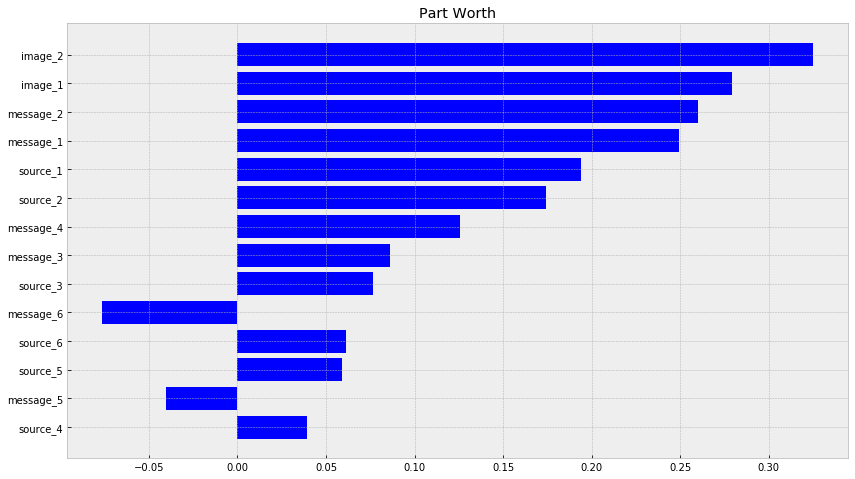

source_4     0.039280
message_5   -0.040539
source_5     0.059052
source_6     0.061542
message_6   -0.076269
source_3     0.076398
message_3    0.085990
message_4    0.125658
source_2     0.174130
source_1     0.193986
message_1    0.249209
message_2    0.260338
image_1      0.279550
image_2      0.324838
Name: param_w, dtype: float64


In [101]:
f, ax = plt.subplots(figsize=(14, 8))
plt.title('Part Worth')
pwu = df_res['param_w']
xbar = np.arange(len(pwu))
plt.barh(xbar, pwu, color=df_res['c'])
plt.yticks(xbar, labels=df_res['param_name'])
plt.show()
print(pwu)

In [102]:
# need to assemble per attribute for every level of that attribute in dicionary
range_per_feature = dict()
for key, coeff in res.params.items():
    sk =  key.split('_')
    feature = sk[0]
    if len(sk) == 1:
        feature = key
    if feature not in range_per_feature:
        range_per_feature[feature] = list()
        
    range_per_feature[feature].append(coeff)

In [103]:
# importance per feature is range of coef in a feature
# while range is simply max(x) - min(x)
importance_per_feature = {
    k: max(v) - min(v) for k, v in range_per_feature.items()
}

# compute relative importance per feature
# or normalized feature importance by dividing 
# sum of importance for all features
total_feature_importance = sum(importance_per_feature.values())
relative_importance_per_feature = {
    k: 100 * round(v/total_feature_importance, 3) for k, v in importance_per_feature.items()
}


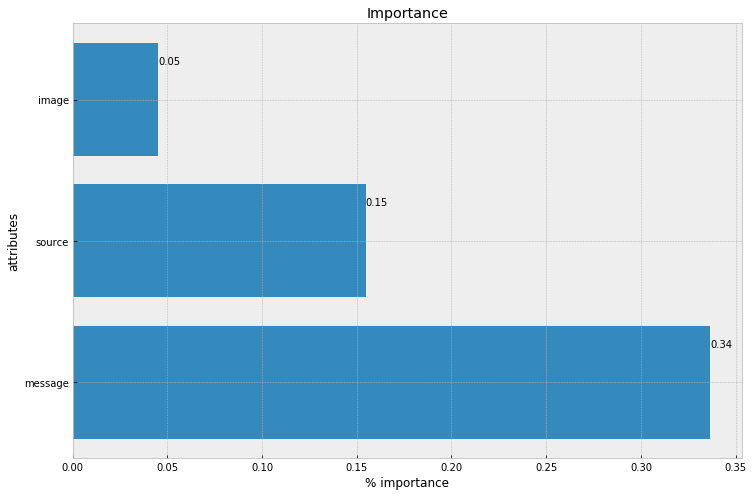

In [104]:
alt_data = pd.DataFrame(
    list(importance_per_feature.items()), 
    columns=['attr', 'importance']
).sort_values(by='importance', ascending=False)


f, ax = plt.subplots(figsize=(12, 8))
xbar = np.arange(len(alt_data['attr']))
plt.title('Importance')
plt.barh(xbar, alt_data['importance'])
for i, v in enumerate(alt_data['importance']):
    ax.text(v , i + .25, '{:.2f}'.format(v))
plt.ylabel('attributes')
plt.xlabel('% importance')
plt.yticks(xbar, alt_data['attr'])
plt.show()

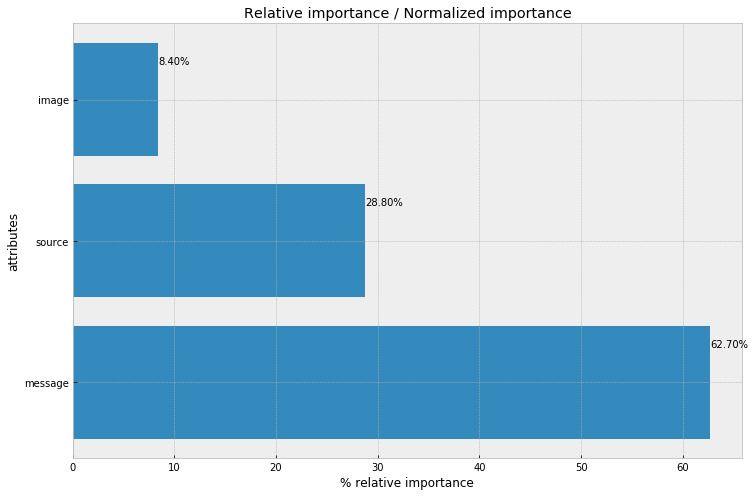

In [87]:
alt_data = pd.DataFrame(
    list(relative_importance_per_feature.items()), 
    columns=['attr', 'relative_importance (pct)']
).sort_values(by='relative_importance (pct)', ascending=False)


f, ax = plt.subplots(figsize=(12, 8))
xbar = np.arange(len(alt_data['attr']))
plt.title('Relative importance / Normalized importance')
plt.barh(xbar, alt_data['relative_importance (pct)'])
for i, v in enumerate(alt_data['relative_importance (pct)']):
    ax.text(v , i + .25, '{:.2f}%'.format(v))
plt.ylabel('attributes')
plt.xlabel('% relative importance')
plt.yticks(xbar, alt_data['attr'])
plt.show()
